# MT2022161 ADITYA.M 
ASSIGNMENT -1 
[AI - 511]

### PREPROCESSING 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt


In [2]:
d=pd.read_csv("breast_cancer.csv")

In [3]:
d.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
d.isna().sum()


id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

Last column and the 'id' column are not useful , hence we can get rid of it.

In [5]:
d.drop(d.columns[[0,-1]], axis=1, inplace=True)

In [6]:
d['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

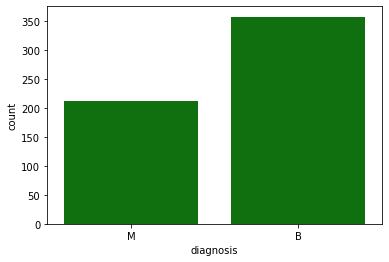

In [7]:
import seaborn as sns
sns.countplot(x='diagnosis', data=d, color='green')  

There are sufficinet number of data points in both the classes to train the model properly.

In [8]:
d.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

#### label encoding

In [9]:
#encoding the 'catogery' column into a numeric format
for i,classification in enumerate(d.iloc[:,0].values): 
    if classification =='M': 
        d.iloc[i,0]=1 
    else: 
        d.iloc[i,0]=0 

#### standerdization of data 

In [10]:
#getting the input features and output variable from the data set after standerdization
y=d.iloc[:,0]
for feature in d.columns[1:]: 
    mean=d[feature].mean()
    std=d[feature].std() 
    min=d[feature].min() 
    max=d[feature].max()
    d[feature]=((d[feature]-mean)/(std)) 
x=d.iloc[:,1:] #standerdized values
x=x.values
y=y.values

#### data splitting 

In [11]:
# splitting the data into train test 
import random
def split(X,Y,ratio=0.4):
    n=int(ratio*len(Y))
    #train size is 40% by default
    train_index=[]
    test_index=[]

    while len(train_index)!=n: 
        k=random.randrange(0,len(X))
        if k not in train_index: 
            train_index.append(k)
        else: 
            pass 
    train_index.sort()

    for i in range(0,len(X)): 
        if i not in train_index: 
            test_index.append(i)

    x_train=[]
    y_train=[]
    for index in train_index: 
        x_train.append(X[index])
        y_train.append(Y[index])
    
    x_test=[]
    y_test=[]
    for index in test_index: 
        x_test.append(X[index])
        y_test.append(Y[index])
    return x_test,x_train,y_test,y_train 

In [12]:
x_test,x_train,y_test,y_train=split(x,y,0.7) #70% of dataset for training
x_test=np.array(x_test)
x_train=np.array(x_train)
y_test=np.array(y_test)
y_train=np.array(y_train)

#### Taking x and y in np arrays for matrix multiplication

In [13]:
x_test=x_test.T
x_train=x_train.T
y_test=y_test.reshape(1,x_test.shape[1])
y_train=y_train.reshape(1,x_train.shape[1])
print(x_test.shape)
print(y_test.shape)
print(x_train.shape)
print(y_train.shape)

(30, 171)
(1, 171)
(30, 398)
(1, 398)


# LOGISTIC REGRESSION

### STEP 1: defining the model class

In [14]:
class logisticRegression(): 
    def __init__(self): 
        self.w=None # w1 till wk 
        self.b=None # w0 ----> y=w0+w1x1+w2x2+.......
    
    def sigmoid(self,t): 
        return 1/(1+np.exp(-t))
    
    def fit(self,X,Y,lr,iter):
        self.w=None
        self.b=None
        n,k=X.shape[1],X.shape[0] #n data points given and k features
        self.w=np.zeros((k,1)) #weights for all the features
        self.b=0 #constant parameter
        while(iter): 
            iter-=1
            line=np.dot(self.w.T,X)+self.b #wT*x is being calculated
            yp=self.sigmoid(line) # sigmoid(wT*x)
            dW=(1/n)*np.dot(Y-yp,X.T) 
            dB=(1/n)*np.sum(Y-yp)
            self.w=self.w+lr*dW.T #moving in the direction of gradient to maximize cost
            self.b=self.b+lr*dB
    
    def predict(self,x):
        y=np.dot(self.w.T,x)+self.b
        y_pred=self.sigmoid(y)
        n=len(y_pred[0])
        for i in range(n): 
            if y_pred[0][i]>0.5: 
                y_pred[0][i]=1 
            else: 
                y_pred[0][i]=0 
        return y_pred
    
    def validate(self,y_pred,y_test): 
        true_p=true_n=false_n=false_p=0
        n=len(y_pred[0])
        for i in range(n): 
            if y_pred[0][i]==y_test[0][i]: 
                if y_pred[0][i]==1: 
                    true_p+=1
                else: 
                    true_n+=1
            else: 
                if y_pred[0][i]==1: 
                    false_p+=1
                else: 
                    false_n+=1 
        #precision is nothing but the total number of correct positive predictions /all predicted positive
        precision=(true_p)/(true_p+false_p)
        #recall is equal to number of correct positive predictions / number of actual positives
        recall=(true_p)/(true_p+false_n)
        #harmonic mean of recall and precision 
        f1score=(2*precision*recall)/(recall+precision)
        print("----------------Confusion Matrix----------------")
        print("total number of observations:",n)
        print("true positive:",true_p)
        print("true negative:",true_n)
        print("false positive:",false_p)
        print("false negative:",false_n)
        print("-------------------------------------------------")
        print("precision of your model is:",precision)
        print("recall of your model is:",recall)
        print("f1score of your model is:",f1score)
        print("accuracy of your model is:",(true_p+true_n)/n)
        
        
    

### Step 2: Gradient Ascent predection fot testing data

In [15]:
mod2=logisticRegression()
mod2.fit(x_train,y_train,0.001,10000)
y_pred=mod2.predict(x_test)
mod2.validate(y_pred,y_test)

----------------Confusion Matrix----------------
total number of observations: 171
true positive: 48
true negative: 119
false positive: 2
false negative: 2
-------------------------------------------------
precision of your model is: 0.96
recall of your model is: 0.96
f1score of your model is: 0.96
accuracy of your model is: 0.9766081871345029


In [16]:
from sklearn.metrics import confusion_matrix, f1_score 
print(confusion_matrix(y_test.T,y_pred.T))
print(f1_score(y_test.T,y_pred.T))

[[119   2]
 [  2  48]]
0.96


# Naive Bayes Classifier


##### Naive Bayes Classifier is based on the Naive assumption which assums that all the features in the dataset and independent of each other and are equally important. 

####  Data 

In [17]:
d.head(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,...,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312
1,1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,...,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943
2,1,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,...,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214
3,1,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,...,-0.281217,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672
4,1,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,...,1.297434,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751
5,1,-0.475956,-0.834601,-0.386808,-0.505206,2.235455,1.243242,0.865540,0.823931,1.004518,...,-0.165353,-0.313560,-0.114908,-0.244105,2.046712,1.720103,1.262133,0.905091,1.752527,2.239831
6,1,1.169878,0.160508,1.137124,1.094332,-0.123028,0.088218,0.299809,0.646366,-0.064268,...,1.367780,0.322599,1.367122,1.274098,0.518184,0.021196,0.509104,1.195664,0.262245,-0.014718
7,1,-0.118413,0.358135,-0.072803,-0.218772,1.602639,1.139100,0.060972,0.281702,1.402121,...,0.163619,0.400695,0.099361,0.028834,1.446688,0.724148,-0.021035,0.623647,0.477221,1.724917
8,1,-0.319885,0.588312,-0.183919,-0.383870,2.199903,1.682529,1.218025,1.149680,1.963872,...,-0.161215,0.822090,-0.031581,-0.248145,1.661295,1.816711,1.278909,1.390393,2.387756,1.287517
9,1,-0.473118,1.104467,-0.329192,-0.508616,1.581308,2.561105,1.737343,0.940932,0.796597,...,-0.243975,2.440961,-0.286026,-0.297148,2.318256,5.108382,3.991920,1.618591,2.368360,6.840837


In [18]:
d.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-3.142575e-15,-6.558316e-15,-7.012551e-16,-8.339355e-16,6.083788e-15,-1.081346e-15,-3.703345e-16,9.935423e-16,-1.888550e-15,-1.424363e-15,...,-2.346102e-15,1.761138e-15,-1.214416e-15,5.919889e-16,-5.036783e-15,-2.118204e-15,6.899382e-16,-1.732650e-16,-2.454417e-15,2.438979e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.027864e+00,-2.227289e+00,-1.982759e+00,-1.453164e+00,-3.109349e+00,-1.608721e+00,-1.113893e+00,-1.260710e+00,-2.741705e+00,-1.818265e+00,...,-1.725382e+00,-2.222039e+00,-1.691872e+00,-1.221348e+00,-2.680337e+00,-1.442609e+00,-1.304683e+00,-1.743529e+00,-2.159060e+00,-1.600431e+00
25%,-6.887793e-01,-7.253249e-01,-6.913472e-01,-6.666089e-01,-7.103378e-01,-7.464292e-01,-7.430941e-01,-7.372951e-01,-7.026215e-01,-7.220040e-01,...,-6.743279e-01,-7.479711e-01,-6.889721e-01,-6.415713e-01,-6.906227e-01,-6.804845e-01,-7.558491e-01,-7.557349e-01,-6.412994e-01,-6.913035e-01
50%,-2.148925e-01,-1.045442e-01,-2.357726e-01,-2.949274e-01,-3.486040e-02,-2.217454e-01,-3.419391e-01,-3.973715e-01,-7.156354e-02,-1.781226e-01,...,-2.688030e-01,-4.347738e-02,-2.857288e-01,-3.408813e-01,-4.680159e-02,-2.692639e-01,-2.180402e-01,-2.232725e-01,-1.272975e-01,-2.162538e-01
75%,4.689800e-01,5.836621e-01,4.992377e-01,3.631877e-01,6.356397e-01,4.934227e-01,5.255994e-01,6.463664e-01,5.303125e-01,4.705693e-01,...,5.215568e-01,6.577623e-01,5.398040e-01,3.572747e-01,5.970195e-01,5.391944e-01,5.306742e-01,7.118836e-01,4.497425e-01,4.503661e-01
max,3.967796e+00,4.647799e+00,3.972634e+00,5.245913e+00,4.766717e+00,4.564409e+00,4.239858e+00,3.924477e+00,4.480808e+00,4.906602e+00,...,4.090590e+00,3.882489e+00,4.283568e+00,5.924959e+00,3.951897e+00,5.108382e+00,4.696536e+00,2.683516e+00,6.040726e+00,6.840837e+00


In [19]:
x_train.shape # 30 features and 341 data points......... 30 rows

(30, 398)

#### Defining the model class for binary NaiveBayes

In [20]:
class binaryNaiveBayes(): 
    def __init__(self): 
        self.mean0=None #mean for class 0
        self.std0=None #standerd deviation for class  0
        self.mean1=None 
        self.std1=None
        self.countzero=None # number of data points of class 0 in training data
        self.countone=None 
        self.n=None

    def fit(self,x,y): 
        x=x.T
        y=y.T
        self.n=len(y) #number of data points
        self.countone=0 
        self.countzero=0
        k=x.shape[1] #number of features
        self.mean0=[0 for i in range(k)]
        self.mean1=[0 for i in range(k)]
        self.std0=[0 for i in range(k)]
        self.std1=[0 for i in range(k)]
        for i in range(self.n):  #calculating mean for all the features
            if y[i][0]==1: 
                self.countone=self.countone+1 
                for j in range(k): 
                    self.mean1[j]=self.mean1[j]+x[i][j]
            else: 
                self.countzero=self.countzero+1 
                for j in range(k): 
                    self.mean0[j]=self.mean0[j]+x[i][j]
            
        for j in range(k): 
            self.mean1[j]=self.mean1[j]/self.countone 
            self.mean0[j]=self.mean0[j]/self.countzero
        
        for i in range(self.n):  #calculating standerd deviation for all the features
            if y[i][0]==1: 
                for j in range(k): 
                    self.std1[j]=self.std1[j]+((x[i][j]-self.mean1[j])*(x[i][j]-self.mean1[j]))
            
            else: 
                for j in range(k): 
                    self.std0[j]=self.std0[j]+((x[i][j]-self.mean0[j])*(x[i][j]-self.mean0[j]))
            
        for j in range(k): 
            self.std0[j]=self.std0[j]/self.countzero 
            self.std0[j]= self.std0[j]**0.5
            self.std1[j]=self.std1[j]/self.countone
            self.std1[j]=self.std1[j]**0.5

    
    def predict(self,x): 
        x=x.T
        n=x.shape[0] #n data points 
        k=x.shape[1] #k features 
        y_pred=[]
        mean0=self.mean0 
        mean1=self.mean1
        std0=self.std0 
        std1=self.std1
        for i in range(n): 
            prob0=1
            prob1=1
            for j in range(k):
                z0=(x[i][j]-mean0[j])**2/2*(std0[j]**2)
                z1=(x[i][j]-mean1[j])**2/2*(std1[j]**2)
                Pxj_given_0=(1/(std0[j]*(np.sqrt(2*np.pi))*(np.exp(-z0))))
                Pxj_given_1=(1/(std1[j]*(np.sqrt(2*np.pi))*(np.exp(-z1))))
                prob0=prob0*Pxj_given_0 
                prob1=prob1*Pxj_given_1
            prob0=prob0*(self.countzero/self.n)
            prob1=prob1*(self.countone/self.n)

            if prob0<prob1: 
                y_pred.append(0)
            else: 
                y_pred.append(1)
            
        y_pred=np.array(y_pred)
        y_pred=y_pred.reshape((1,n))
        return y_pred 
    
    def validate(self,y_pred,y_test): 
        true_p=true_n=false_n=false_p=0
        n=len(y_pred[0])
        for i in range(n): 
            if y_pred[0][i]==y_test[0][i]: 
                if y_pred[0][i]==1: 
                    true_p+=1
                else: 
                    true_n+=1
            else: 
                if y_pred[0][i]==1: 
                    false_p+=1
                else: 
                    false_n+=1 
        #precision is nothing but the total number of correct positive predictions /all predicted positive
        precision=(true_p)/(true_p+false_p)
        #recall is equal to number of correct positive predictions / number of actual positives
        recall=(true_p)/(true_p+false_n)
        #harmonic mean of recall and precision 
        f1score=(2*precision*recall)/(recall+precision)
        print("----------------Confusion Matrix----------------")
        print("total number of observations:",n)
        print("true positive:",true_p)
        print("true negative:",true_n)
        print("false positive:",false_p)
        print("false negative:",false_n)
        print("-------------------------------------------------")
        print("precision of your model is:",precision)
        print("recall of your model is:",recall)
        print("f1score of your model is:",f1score)
        print("accuracy of your model is:",(true_p+true_n)/n)

####  Training and testing the model with all the columns

In [21]:
k=binaryNaiveBayes() 
k.fit(x_train,y_train)
y_pred=k.predict(x_test)
y_pred.shape
k.validate(y_pred,y_test)

----------------Confusion Matrix----------------
total number of observations: 171
true positive: 47
true negative: 87
false positive: 34
false negative: 3
-------------------------------------------------
precision of your model is: 0.5802469135802469
recall of your model is: 0.94
f1score of your model is: 0.717557251908397
accuracy of your model is: 0.783625730994152


##### As we can see , f1 score and accuracy of the model is not good . This maybe due to the fact that many of the featuers are co-related  and donot follow the Naive Assumption. 

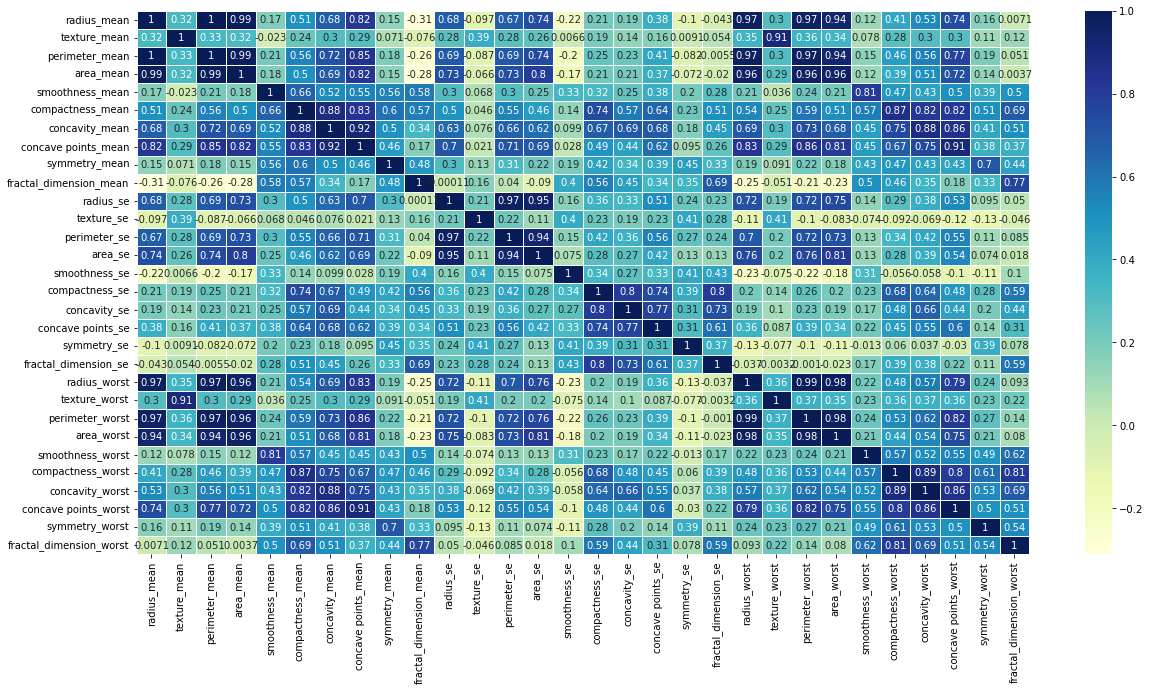

In [22]:
import seaborn as sns  
cor=d.corr() 
plt.figure(figsize=(20,10))
dataplot=sns.heatmap(cor,cmap="YlGnBu",annot=True,linewidths=0.5)

#### Data visualization of all the probability distribution function generated for all the features. 

In [23]:
from scipy.stats import norm

def visualize():
    d0 = d[d['diagnosis']==0]
    d1 = d[d['diagnosis']==1]
    t=0
    for i in d.columns:
        if i=='diagnosis': 
            continue 
        else:
            d0[i]
            plt.figure()
            plt.hist(d0[i],bins=10)
            plt.title(d0[i].name)
            plt.hist(d1[i],bins=10)
            plt.figure()
            x = np.arange(-5,5, 0.001)
            plt.plot(x, norm.pdf(x, k.mean0[t], k.std0[t]))
            plt.plot(x, norm.pdf(x, k.mean1[t], k.std1[t]))
            t=t+1
            

C:\Users\aditya\AppData\Local\Temp\ipykernel_3160\1074915522.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


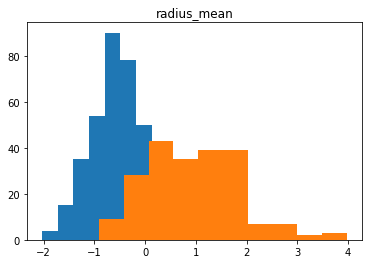

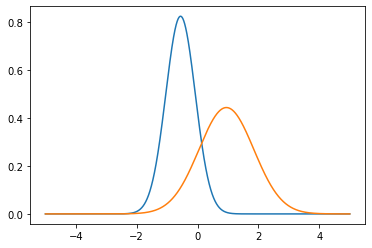

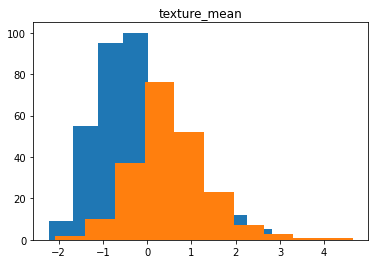

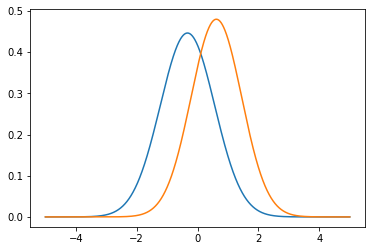

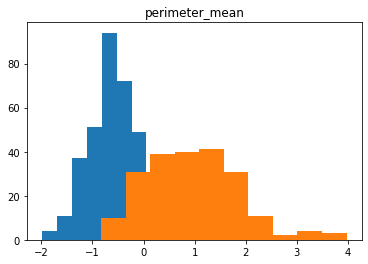

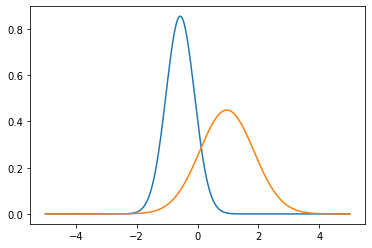

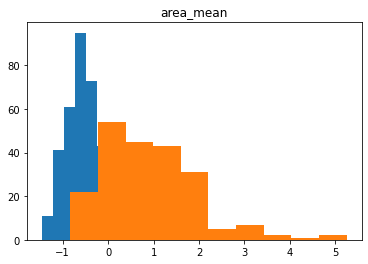

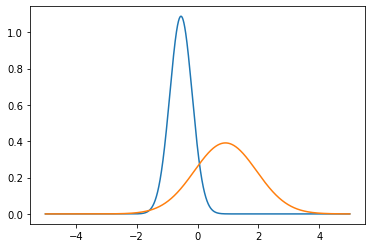

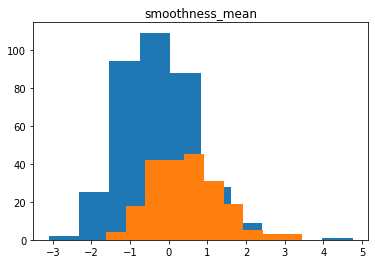

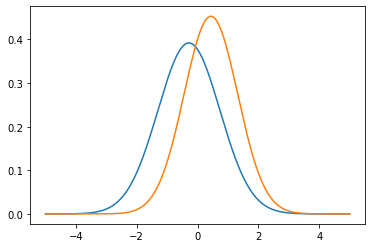

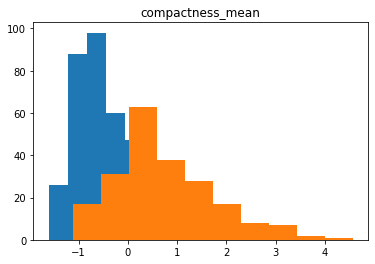

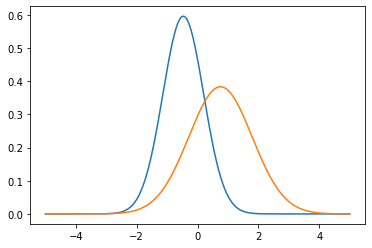

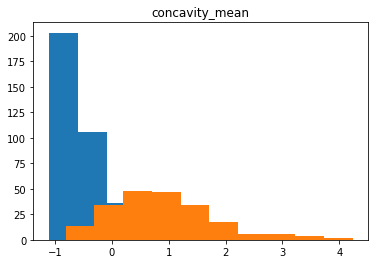

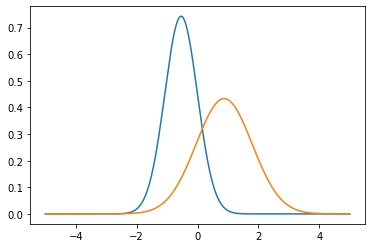

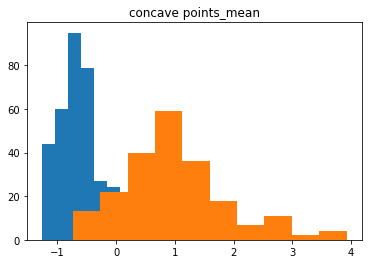

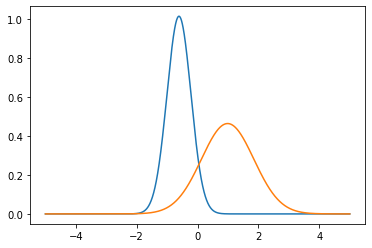

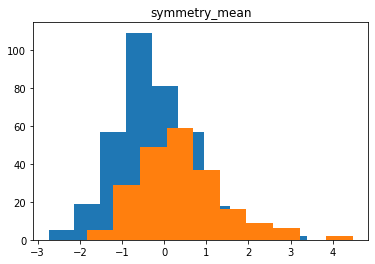

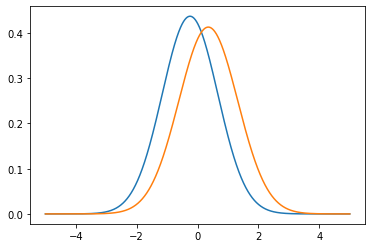

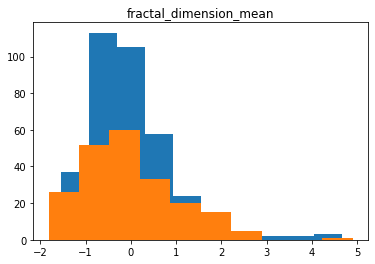

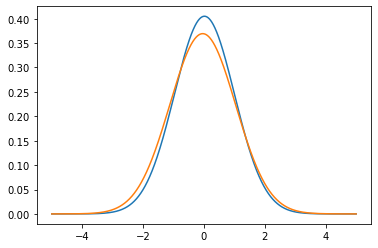

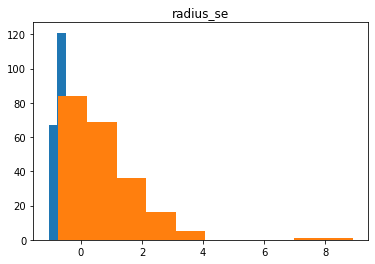

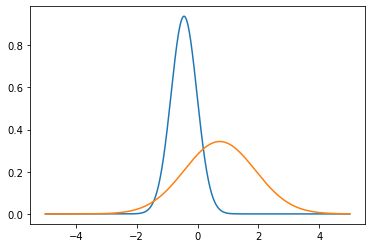

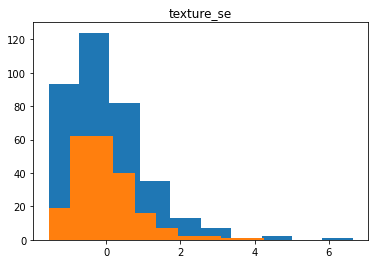

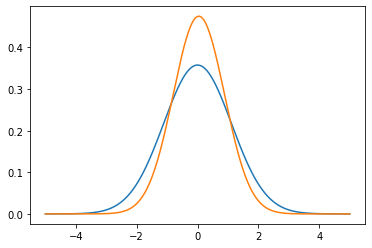

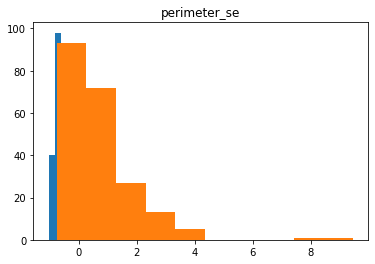

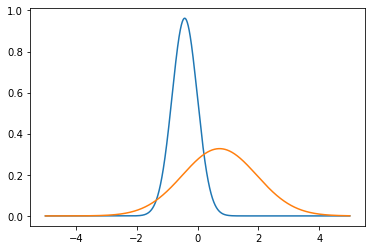

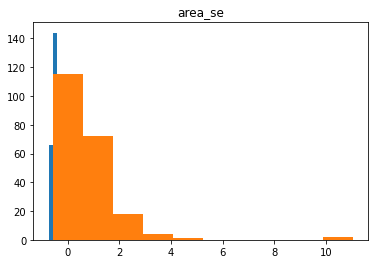

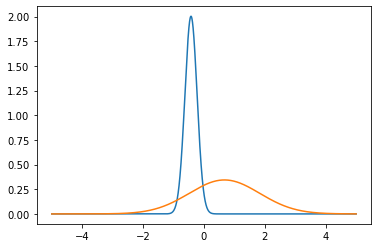

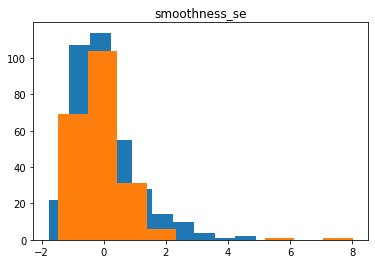

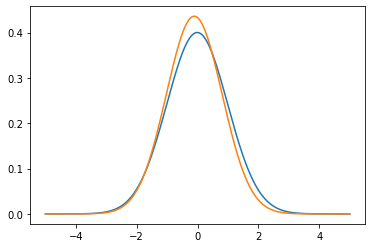

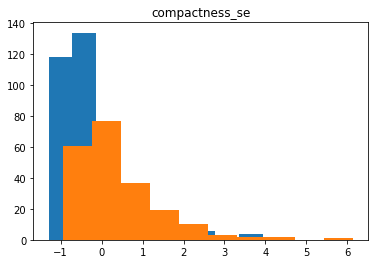

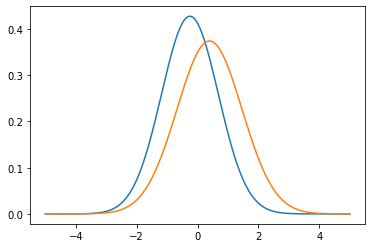

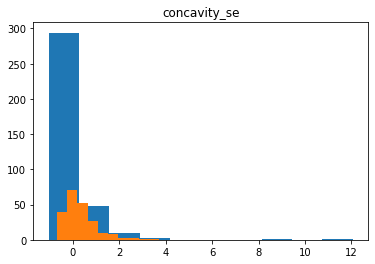

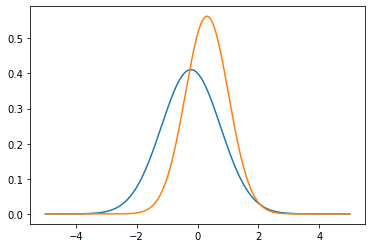

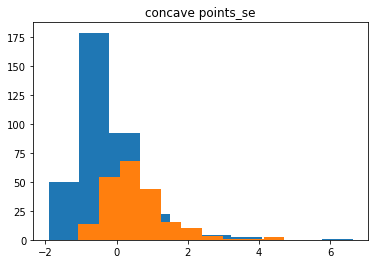

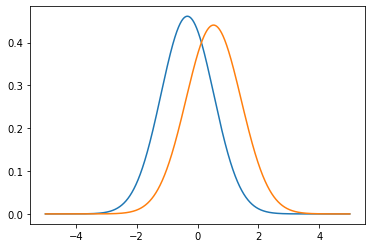

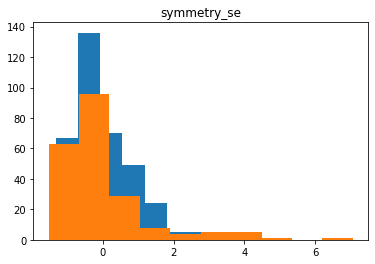

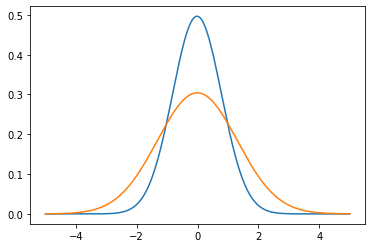

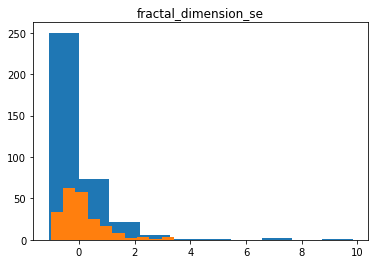

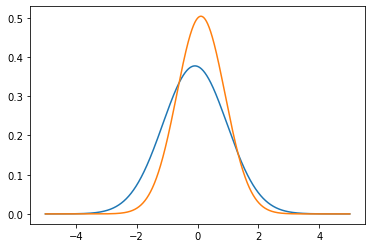

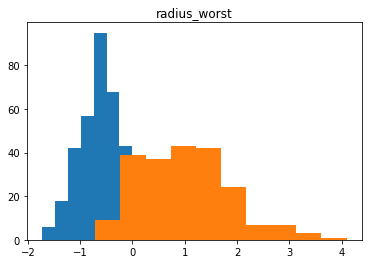

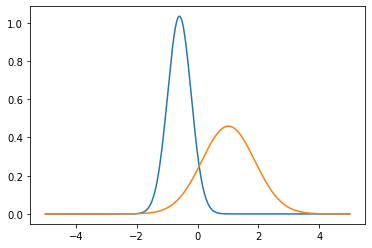

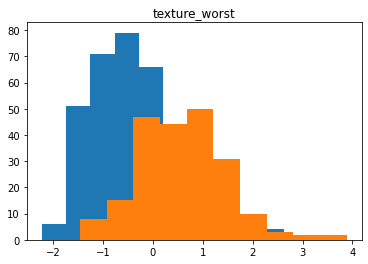

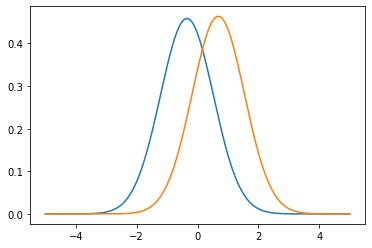

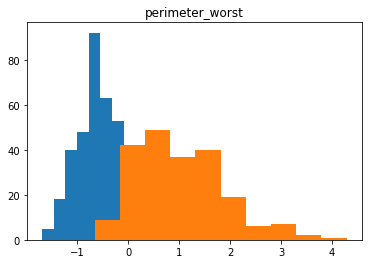

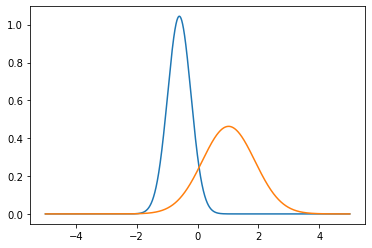

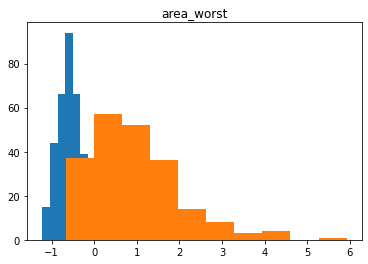

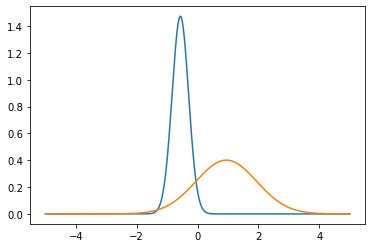

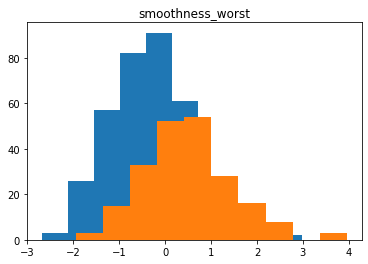

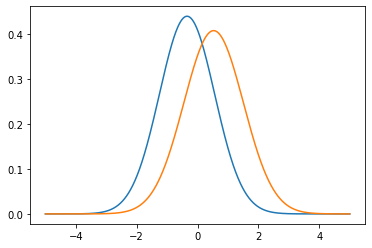

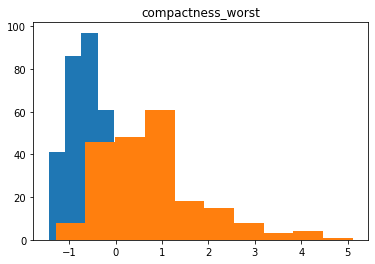

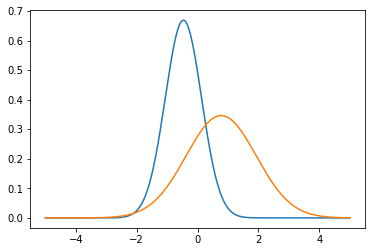

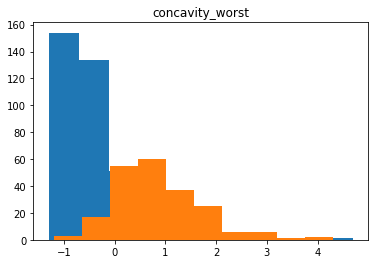

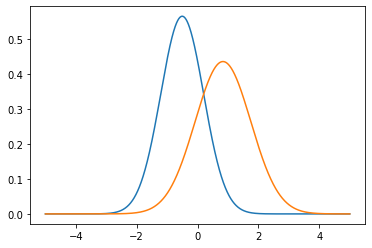

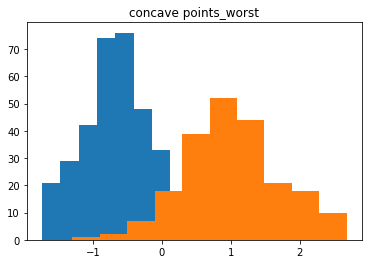

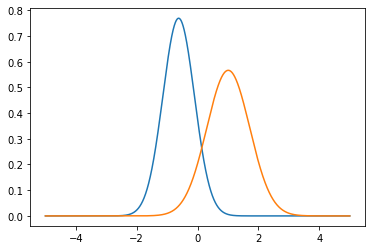

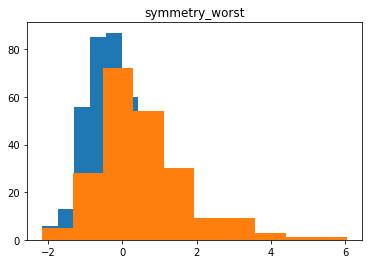

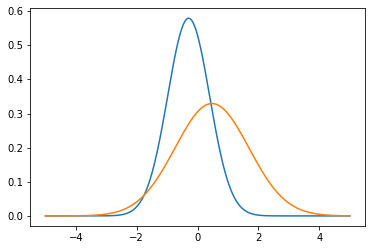

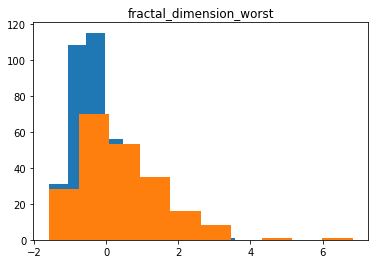

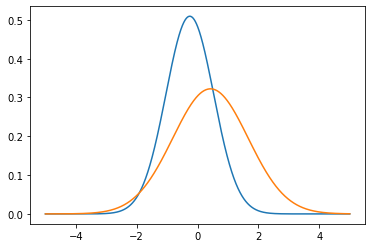

In [24]:
visualize() # to visualize the gaussian curves fitted to each classs for all the features in above code

##### Selecting features 

In [25]:
y=d.iloc[:,0]
x=d[['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean']] 
x=x.values
y=y.values

In [26]:
x_test,x_train,y_test,y_train=split(x,y,0.7)
x_test=np.array(x_test)
x_train=np.array(x_train)
y_test=np.array(y_test)
y_train=np.array(y_train)

In [27]:
x_test=x_test.T
x_train=x_train.T
y_test=y_test.reshape(1,x_test.shape[1])
y_train=y_train.reshape(1,x_train.shape[1])

In [28]:
k=binaryNaiveBayes() 
k.fit(x_train,y_train)
y_pred=k.predict(x_test)
y_pred.shape
k.validate(y_pred,y_test)

----------------Confusion Matrix----------------
total number of observations: 171
true positive: 56
true negative: 86
false positive: 26
false negative: 3
-------------------------------------------------
precision of your model is: 0.6829268292682927
recall of your model is: 0.9491525423728814
f1score of your model is: 0.7943262411347518
accuracy of your model is: 0.8304093567251462


#### Even after selecting few features which are not corelated we are not able to  imporove the f1 score this maybe due to the fact that the co-related featues might have some more useful information which needs to be considered for classification . Hence multidimensional Gaussian has to be fitted 

## Selecting features for Multi-dimensional Gaussian


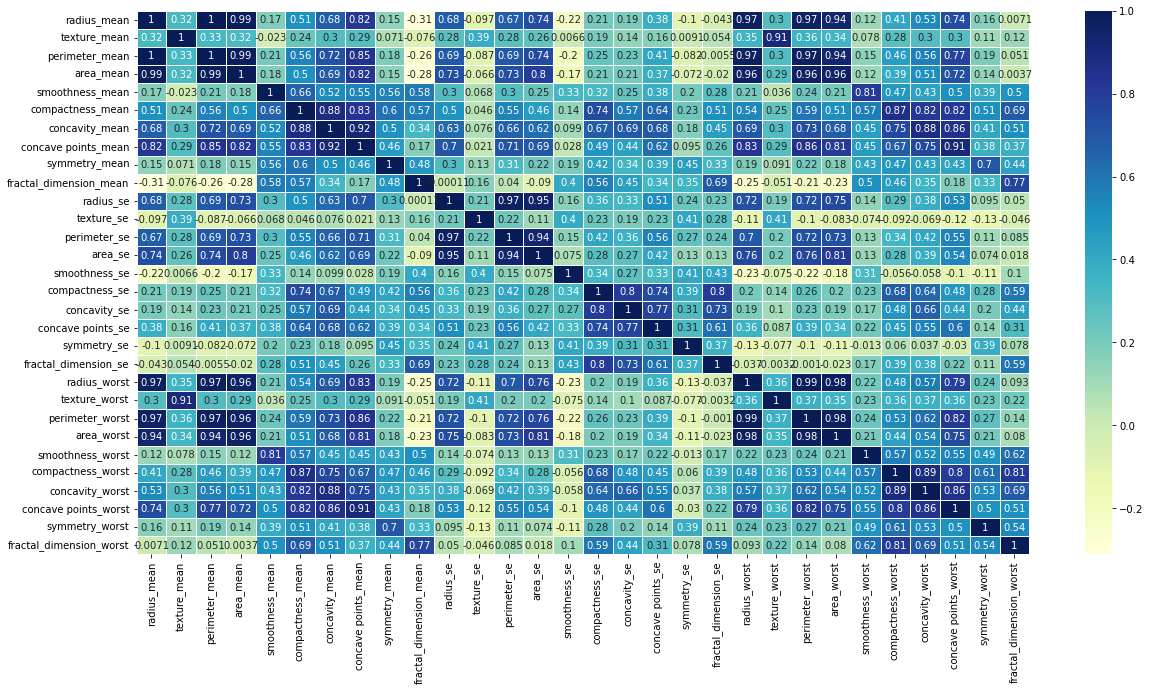

In [29]:
import seaborn as sns  
cor=d.corr() 
plt.figure(figsize=(20,10))
dataplot=sns.heatmap(cor,cmap="YlGnBu",annot=True,linewidths=0.5)

#### perimeter_mean  and area_mean  has almost 100% corelation with radius_mean , hence drop it.

#### From remaining features create a multi dimensioanl gaussian for the features that have more than 0.75 co-relation .

####  Treat the remaining features as independent and  fit a 2-D gaussian.